# Comparison of spectrum between eNATL60 outputs and Alitka Satellite 

Requisites :
 - git clone https://github.com/auraoupa/gonzag_cloud
 - git clone https://github.com/brodeau/climporn
 
Assumes that time is encoded in datetime64 format in both datasets.

Looks for model months in the longest year of Altika serie

In [33]:
import sys
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [34]:
GONZAG_DIR = '/home/jovyan/gonzag_cloud/gonzag' ; # get it there: https://github.com/brodeau/climporn
sys.path.append(GONZAG_DIR)
import gonzag as gz


## Data

In [35]:
import xarray as xr
osn_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60_surface_region_1'
dsmod = xr.open_zarr(osn_url, consolidated=True)

In [36]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates:
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables:
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosstsst       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [37]:
name_mod = 'eNATL60-Region1'
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
l_griddist = False

In [38]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat["al"].to_dask()

In [39]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185024 ... 2...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    creator_name:              CMEMS - Sea Level Thematic Assembly Center
    creator_url:               http://marine.copernicus.eu
    history:                   2019-02-20T19:39:52Z: Creation
    institution:               CLS, CNES
    keywords:                  Oceans > Ocean Topography > Sea Surface Height
    keywords_vocabulary:       NetCDF COARDS Climate and Forecast Standard Names
    license:                   http://marine.copernicus.eu/web/27-service-com...
    platform:                  Altika
    processing_level:          L3
    product_version:           2019
    project:                   COPERNICUS MARINE ENVIRONMENT MONITORING SERVI...
    references:                http://marine.copernicus.eu
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [40]:
name_sat= 'Altika'
name_ssh_sat='sla_unfiltered'

## Time overlap between model and satellite ?
Assume that model is less than 1 year, satellite has at least one whole year, we take the overlapping period without considering which year is this

In [41]:
    (date1,date2), (Nts,Ntm) = gz.GetTimeOverlap( dssat , dsmod )
    print(' *** Time overlap between model and satellite in UNIX epoch time: it1, it2',date1,'--',date2)


 *** Time overlap between model and satellite in UNIX epoch time: it1, it2 2014-02-01 -- 2014-04-30


## Create object `ModelGrid` containing all the model (aka _source_) 2D+T domain grid info

In [42]:
  
    ModelGrid = gz.ModGrid( dsmod, date1 , date2 , dsmod, name_lsm_mod, distorded_grid=False )



 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.99 292.17
     * lat_min, lat_max =  30.01 40.01
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2136
       ==> time record dates: 2014-02-01 to 2014-04-30, included



## Create object `SatelliteTrack` containing all the satellite track (aka target) info

In [43]:
SatelliteTrack = gz.SatTrack( dssat, date1, date2, name_ssh_sat, Np=Nts, \
                              domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...

 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10236
       ==> time record indices: 14883510 to 19033581, included

       separated in 86 tracks


## Process the tracks in parallel (results are saved in separate netcdf files)

In [12]:
def process_one_track(track):
    tt = "{:02d}".format(track)
    Solution0 = gz.Model2SatTrack( ModelGrid, name_ssh_mod, SatelliteTrack, name_ssh_sat, track )
    c1     = 'Model SSH interpolated in space (' ; c2=') and time on satellite track'
    vvar   = [ 'latitude', 'longitude', name_ssh_mod+'_np'   , name_ssh_mod+'_bl' , name_ssh_sat          , 'distance'                            ]
    vunits = [ 'deg.N'   , 'deg.E'    ,          'm'         ,     'm'            ,    'm'                ,    'km'                               ]
    vlongN = [ 'Latitude', 'Longitude', c1+'nearest-point'+c2,  c1+'bilinear'+c2  , 'Input satellite data', 'Cumulated distance from first point' ]
    from gonzag.config import rmissval
    iw = gz.io.SaveTimeSeries( Solution0.time, \
                             nmp.array( [Solution0.lat, Solution0.lon, Solution0.ssh_mod_np,
                                         Solution0.ssh_mod, Solution0.ssh_sat, Solution0.distance] ), \
                             vvar, 'results/result_'+str(tt)+'.nc', time_units='',\
                             vunits=vunits, vlnm=vlongN, missing_val=rmissval )
    return Solution0


In [13]:
import dask
import sys
import dask.bag as db
import numpy as nmp

In [14]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:42409 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 64 Memory: 270.48 GB


In [15]:
%%time
b = db.from_sequence(nmp.arange(len(SatelliteTrack.index_tracks)), npartitions=64)
results = b.map(lambda x: process_one_track(x))
final = results.compute()

CPU times: user 28min 33s, sys: 3min 16s, total: 31min 50s
Wall time: 1h 28min 16s


## Plot the results

In [44]:
import xarray as xr
import sys
import glob
import numpy as nmp
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

%matplotlib inline


In [45]:
CLIMPORN_DIR = '/home/jovyan/climporn/python' ; # get it there: https://github.com/brodeau/climporn
sys.path.append(CLIMPORN_DIR)
import climporn as cp


### Data

In [46]:
fresults=sorted(glob.glob('results/result_??.nc'))
dsn=xr.open_mfdataset(fresults,concat_dim='time',combine='nested')

In [47]:
#clean up some remaining Nans

ds=dsn.where(nmp.isnan(ds.sla_unfiltered)==0, drop=True)

### Maps of the tracks

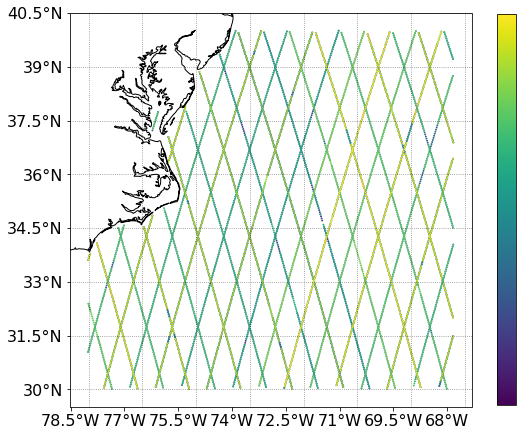

In [48]:


fig = plt.figure(num = 1, figsize=(9,9), facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m")
ax.set_xticks(nmp.arange(-80,-60,1.5), crs=ccrs.PlateCarree())
ax.set_xticklabels(nmp.arange(-80,-60,1.5))
ax.set_yticks(nmp.arange(30,50,1.5), crs=ccrs.PlateCarree())
ax.set_yticklabels(nmp.arange(30,50,1.5))
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)

idx = ds.longitude
idy = ds.latitude
t = ds.time_counter
cf = ax.scatter(idx, idy, c=t, cmap = 'viridis', marker='.', s=3 )
    
cbar = plt.colorbar(cf,shrink=0.8)
cbar.set_ticks([])

plt.savefig('plots/tracks_'+name_sat+'-'+name_mod+'.png')

### Time series of SSH 

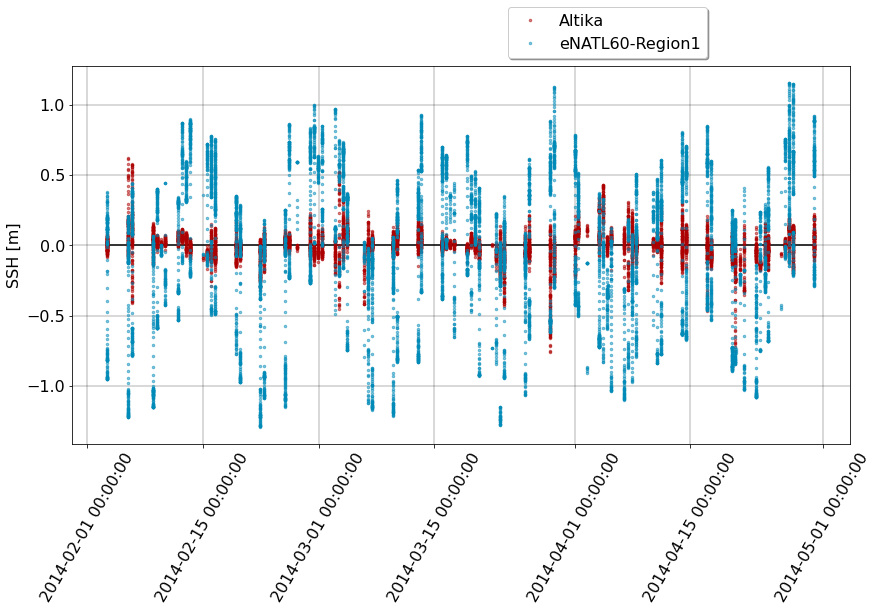

In [49]:

clr_sat = '#AD0000'
clr_mod = '#008ab8'

VT = ds.time_counter ; # time from UNIX Epoch to Matlplotlib friendly...

fig = plt.figure(num = 1, figsize=(12,7), facecolor='w', edgecolor='k')
ax = plt.axes([0.07, 0.24, 0.9, 0.75])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation='60')
plt.hlines(0,nmp.min(ds.time_counter.values),nmp.max(ds.time_counter.values), colors='k',                   label=None,  zorder=5)
plt.plot(VT, ds.sla_unfiltered-nmp.mean(ds.sla_unfiltered), '.', color=clr_sat, markersize=5, 
         alpha=0.5, label=name_sat, zorder=10)
plt.plot(VT, ds.sossheig_bl-nmp.mean(ds.sossheig_bl), '.', color=clr_mod, markersize=5, 
         alpha=0.5, label=name_mod, zorder=15)
plt.ylabel('SSH [m]')
ax.grid(color='k', linestyle='-', linewidth=0.3)
lgnd = plt.legend(bbox_to_anchor=(0.55, 1.), ncol=1, shadow=True, fancybox=True)

plt.savefig('plots/SSH_'+name_sat+'-'+name_mod+'.png')

### Spectrum

 *** [SegmentSelection()]: Will use 23 segments with a fixed length of 100 points!
     ==> 23 selected segments out of the 242 available (requested minimum length is 70 points)

0
 *** [Process4FFT()]: applying linear detrending...
 *** [Process4FFT()]: centering about 0...
 *** [Process4FFT()]: applying "Tukey" tappering...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22

 *** [ApplyFFT()]: Applying FFT with a dx_sample of  6.603  km



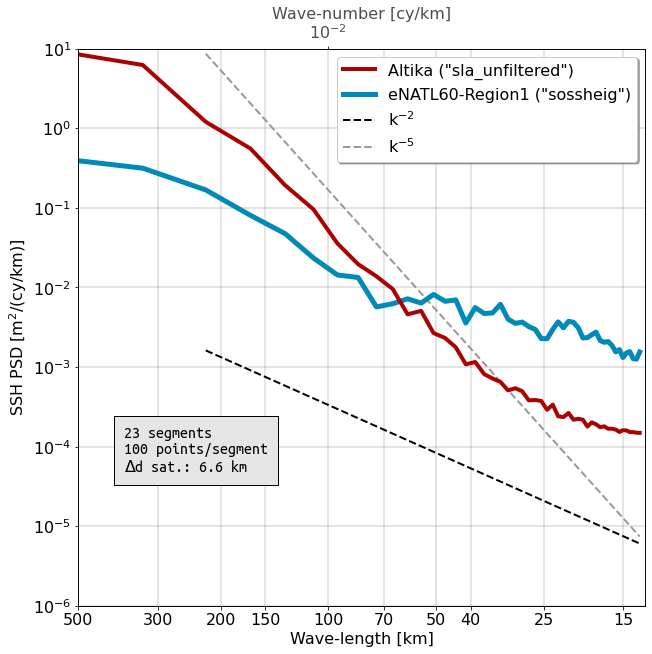

In [50]:
ISeg_beg, ISeg_end = gz.FindUnbrokenSegments( ds.time, ds.distance, ds.sossheig_bl, \
                                             rcut_time=1.2e+09, rcut_dist=7.8 )
NbSeg, Nsl, IDEDSeg = gz.SegmentSelection(ISeg_beg, ISeg_end, np_valid_seg=70)
XPs, XPm, rdist_sample = gz.Process4FFT( IDEDSeg, ds.distance, ds.sossheig_bl, ds.sla_unfiltered )
Kwn, PwSpc_s, PwSpc_m = gz.ApplyFFT( IDEDSeg, XPs, XPm, rdist_sample )

# Building our spectrum as the mean of the NbSeg spectra:
vps_mod = nmp.mean(PwSpc_m[:,:],axis=0)
vps_sat = nmp.mean(PwSpc_s[:,:],axis=0)

# Blabla for the plot:
cinfrm = str(NbSeg)+' segments\n'+str(Nsl)+' points/segment\n'+r'$\Delta$d sat.: '+str(round(rdist_sample,1))+' km'

ii = cp.plot("pow_spectrum_ssh")(Kwn, vps_mod, clab1=name_mod+' ("'+name_ssh_mod+'")', clr1=clr_mod, lw1=5, \
                                 cinfo=cinfrm, logo_on=False, \
                                 L_min=13., L_max=500., P_min_y=-6, P_max_y=1, \
                                 l_show_k4=False, l_show_k5=True, l_show_k11o3=False, l_show_k2=True, \
                                 vk2=Kwn, vps2=vps_sat, clab2=name_sat+' ("'+name_ssh_sat+'")', clr2=clr_sat, lw2=4)

plt.savefig('plots/spectrum_SSH_'+name_sat+'-'+name_mod+'.png')